# Exploration of Historical NBA Team Efficiency
This is a continuation of my first post, where I explained the perils of my paralysis with choice. To recap, I suck at making decisions, but I love to be the guy who makes decisions. I've accepted that it's a process, and that I can only get better by failing very quickly, a lot, and very severely. Last blog post, I explained that I wanted to dive into basketball stats, but didn't really know where to start. I threw a proverbial dart at the dartboard of data on www.basketball-reference.com. I came to the mindblowing conclusion of if you score more efficiently than your opponent, you win the game. I then thought about closing my blog and collecting my cheque, but NO I am not wired that way and I must go deeper!

Here, we dive a bit more into efficiency and explore some factors that may affect how offensive and defensive efficiency.

## Efficiency
Again, we have defined efficiency as "Offensive Rating" and "Defensive Rating"

$$ORtg=\frac{Points\ Scored}{100\ Possessions}$$

$$DRtg=\frac{Points\ Allowed}{100\ Possessions}$$

## Being Efficient
Man... where to go from here. I love basketball and play pick up from time to time, but now I actually have to be smart about it?! I obviously don't want to offend real basketball players with my playing "experience". I'm basically that guy at the Y who can channel Steph Curry on the odd game every night, but otherwise am too small and too out of shape to make any real impact on the games.

![](http://cdnt3m-a.akamaihd.net/tem/warehouse/234/042/234042_043_lt.jpg)

So... what makes an __*NBA*__ team efficient? I really don't know. If I knew, I wouldn't be sitting here in Edmonton, Alberta, Canada.

Again, if you score more points, you win. Naturally other factors like rebounds, assists, steals, blocks, turnovers, and fouls must play a role in efficiency as well.

Efficiency is still an easy concept at the end of the day. If you score on any given possession, you increase your efficiency. If you don't, you If we break down what can happen on any given possession:
- Score
    - 2 pt FG
    - 3 pt FG
    - 1 pt FT
- Dont' Score
    - Turnover
    - Foul
    - Missed shot + defensive rebound
    - Quarter ends
    
When we look at efficiency and pace, [http://www.basketball-reference.com](http://www.basketball-reference.com/about/glossary.htm#poss) calculates it with a long-winded formula that includes metrics that
1. I don't know much about at this point in time (e.g. team rebounds), and
2. Is probably beyond the scope of my analysis at this time anyways

But it can be simplified to something to the order of:

$$Poss=FGA+0.5\times FTA-ORB+TO$$

So, with this formula, we can isolate for certain factors that might affect our efficiency. We will score what we score, but it's the number of possessions that we took to score it that will determine our efficiency (is one way to look at it anyways).
- **FGA**: Obviously, the more attemps we take, the more decrease in our efficiency
- **FTA**: Same as FGA, but it's weighted by 0.5 because generally you go the line for two FT's, so this makes the incorrect assumption that each possession at the free throw line includes 2 free throws, but I will accept it because I don't have a better answer that I can understand at the moment
- **ORB**: I'm not quite sure about this, but it seems that an ORB doesn't end a possession, but extends it, so the more ORB we have, it essentially cancels out an FGA / FTA
- **TO**: Very obviously, if we turn the ball over, we end our possession without a score, lowering our efficiency (offensive fouls are included in here)

Just want to make a side note to myself that I'm not sure how an end of a quarter factors into possessions (if a quarter ends and you don't get a shot off, is it a turnover? Just recorded as nothing probably? But then you don't count it in a possession... anyways this only happens probably like once a game so my uneducated naive self will see it as negligible.

So, with that, let's dive into something... I'm going to dive into a few of these and just explore.

### TECHNOLOGY SIDENOTE
If you're a nerd, but only for basketball, please ignore this. If you're an all out nerd, period, this might explain some of the code you see below.

In this post, I'm trying something new on the Jupyter notebook. I myself am more used to using Python for data ETL, but I've poked around in R a bit and I very much enjoy some of the dplyr and gglpot2 syntaxes. It's very helpful to decouple each operation whether it be data processing or graphing.

Here, I'm trying to use the [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/) package to pipeline between Python and R. At the time of writing this, I'm thinking of just using Python / Pandas / Numpy to clean and organize the data. I'll the pass the dataframes to R for visualization.

I followed this tutorial: [http://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html](http://blog.revolutionanalytics.com/2016/01/pipelining-r-python.html).

I had a few issues with getting rpy2 to recognize and connect to R, but I had to set R_USER and R_HOME environment variables within my windows machine: [http://stackoverflow.com/questions/12698877/how-to-setup-environment-variable-r-user-to-use-rpy2-in-python](http://stackoverflow.com/questions/12698877/how-to-setup-environment-variable-r-user-to-use-rpy2-in-python)

**Edit: On first glance, using rpy2 with Jupyter, it works great. Took a little bit of time to figure out how to pass multiple dataframes over and resize the ggplot2 plot area, but rpy2 makes it quite easy to pass in all those parameters.**

## FGA / FTA
A few factors invovled here. The more you shoot, the more chances you have to score. The better you shoot, the more efficiently you score. We have FGA / FTA and FG% / FT%, and these can be further broken down into 2 pt FG and 3 pt FG. Let's take a look at the Raptors to see if shooting had any particular impacts on winning.

In [1]:
%load_ext rpy2.ipython

In [20]:
%%R
library(ggplot2)
library(gridExtra)
library(scales)

In [241]:
# Load libraries & initial config
import pandas as pd
import numpy as np
import boto3
from StringIO import StringIO

In [22]:
# Retrieve team stats from S3
teamAggDfToAnalyze = pd.read_csv('https://s3.ca-central-1.amazonaws.com/2017edmfasatb/fas_boto/data/teamAggDfToAnalyze.csv', index_col = 0)
print teamAggDfToAnalyze.dtypes

baseStats_Season             object
perGameStats_Tm              object
baseStats_W                   int64
baseStats_L                   int64
baseStats_W/L%              float64
baseStats_SRS               float64
baseStats_Pace              float64
baseStats_Rel_Pace          float64
baseStats_ORtg              float64
baseStats_Rel_ORtg          float64
baseStats_DRtg              float64
baseStats_Rel_DRtg          float64
perGameStats_Age            float64
perGameStats_FG             float64
perGameStats_FGA            float64
perGameStats_FG%            float64
perGameStats_2P             float64
perGameStats_2PA            float64
perGameStats_2P%            float64
perGameStats_3P             float64
perGameStats_3PA            float64
perGameStats_3P%            float64
perGameStats_FT             float64
perGameStats_FTA            float64
perGameStats_FT%            float64
perGameStats_ORB            float64
perGameStats_DRB            float64
perGameStats_TRB            

In [223]:
def shooting2p3pPrepare(team = None):
    if team is None:
        teamDf = teamAggDfToAnalyze
    else:
        teamDf = teamAggDfToAnalyze[teamAggDfToAnalyze['perGameStats_Tm'] == team]

    # Prepare 2PA / 3PA data
    teamShootingAttemptDf = pd.melt(
        teamDf[[
            'season_start_year',
            'perGameStats_2PA',
            'perGameStats_3PA'
        ]],
        id_vars=['season_start_year'], 
        value_vars=['perGameStats_2PA', 'perGameStats_3PA'],
        var_name='shot_type', 
        value_name='attempts'
    )
    
    teamShootingAttemptDf = teamShootingAttemptDf.groupby(['season_start_year', 'shot_type']).agg({
        'attempts': np.average,   # We average the percentage here because when we look at league averages, we will have more than one record per year and shot type
    })
    
    teamShootingAttemptDf.reset_index(inplace = True)
    
    # Prepare FTA data:
    teamFTShootingAttemptDf = teamDf[[
        'season_start_year',
        'perGameStats_FTA'
    ]]
    
    teamFTShootingAttemptDf = teamFTShootingAttemptDf.groupby(['season_start_year']).agg({
        'perGameStats_FTA': np.average,   # We average the percentage here because when we look at league averages, we will have more than one record per year and shot type
    })
    
    teamFTShootingAttemptDf.reset_index(inplace = True)
    
    # Prepare shooting % data
    teamFTShootingPercentageDf = pd.melt(
        teamDf[[
            'season_start_year',
            'perGameStats_2P%',
            'perGameStats_3P%',
            'perGameStats_FT%'
        ]],
        id_vars=['season_start_year'], 
        value_vars=['perGameStats_2P%', 'perGameStats_3P%', 'perGameStats_FT%'],
        var_name='shot_type', 
        value_name='percentage'
    )
    
    teamFTShootingPercentageDf = teamFTShootingPercentageDf.groupby(['season_start_year', 'shot_type']).agg({
        'percentage': np.average,   # We average the percentage here because when we look at league averages, we will have more than one record per year and shot type
    })
    
    teamFTShootingPercentageDf.reset_index(inplace = True)
    
    return teamShootingAttemptDf, teamFTShootingAttemptDf, teamFTShootingPercentageDf

rapsShootingAttemptDf, rapsFTShootingAttemptDf, rapsShootingPercentageDf = shooting2p3pPrepare('TOR')

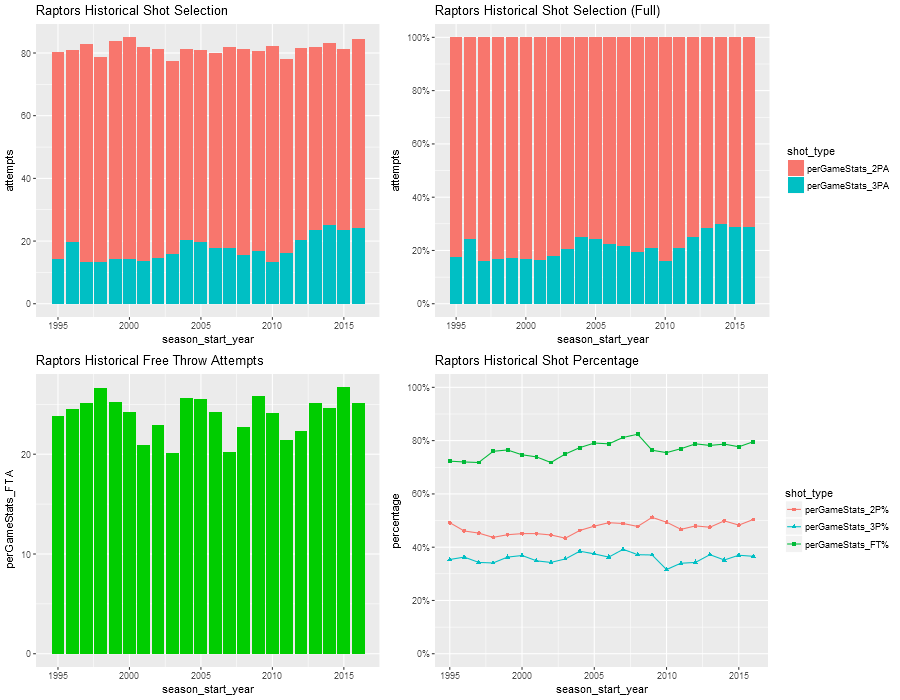

In [229]:
%%R -i rapsShootingAttemptDf -i rapsFTShootingAttemptDf -i rapsShootingPercentageDf -w 900 -h 700 -u px

shooting2p3pPlot <- function(shootingDf, FTShootingDf, percentageDf, teamName){
    # 2PA / 3PA stacked bar
    stackedBarShooting = ggplot(
        shootingDf,
        aes(
            x = season_start_year,
            y = attempts,
            fill = shot_type
        )
    ) + 
    geom_bar(stat = 'identity') +
    guides(fill = FALSE) +
    ggtitle(sprintf("%s Historical Shot Selection", teamName)) + 
    scale_fill_manual(values=c('#F8766D', '#00BFC4', '#00BA38'))

    # 2PA / 3PA 100 stacked bar
    stackedBar100Shooting = ggplot(
        shootingDf,
        aes(
            x = season_start_year,
            y = attempts,
            fill = shot_type,
            position = "fill"
        )
    ) + 
    geom_bar(position = "fill", stat = "identity") + 
    scale_y_continuous(labels = percent, breaks = seq(0, 1, 0.2)) +
    ggtitle(sprintf("%s Historical Shot Selection (Full)", teamName)) + 
    scale_fill_manual(values=c('#F8766D', '#00BFC4', '#00BA38'))

    # FT bar
    barFTShooting = ggplot(
        FTShootingDf,
        aes(
            x = season_start_year,
            y = perGameStats_FTA
        )
    ) +
    geom_bar(stat = 'identity', fill = 'green3') +
    ggtitle(sprintf("%s Historical Free Throw Attempts", teamName)) + 
    scale_fill_manual(values=c('#00BA38'))
    
    # Shot percentage line
    linePercentage = ggplot(
        percentageDf, 
        aes(
            x = season_start_year, 
            y = percentage, 
            group = shot_type, 
            shape = shot_type, 
            color = shot_type
        )
    ) +
    geom_line() +
    geom_point() +
    scale_y_continuous(limits = c(0, 1), labels = percent, breaks = seq(0, 1, 0.2)) +
    ggtitle(sprintf("%s Historical Shot Percentage", teamName)) +
    scale_color_manual(values=c('#F8766D', '#00BFC4', '#00BA38'))

    grid.arrange(stackedBarShooting, stackedBar100Shooting, barFTShooting, linePercentage, ncol = 2, widths = 3:4)
}

shooting2p3pPlot(rapsShootingAttemptDf, rapsFTShootingAttemptDf, rapsShootingPercentageDf, 'Raptors')

It seems that the raptors are a pretty consistent overall. It almost seems that they've been the same team from a shooting perspective. Not too many changes in pace, types of shots attempted, or shooting percentages. It's pretty widely accepted that there's been a huge surge of 3-point shooting (stemming from the Seven Seconds Or Less (SSOL) Suns of D'Antoni where, simply put (BY ME, WHERE MY OPINIONS DON'T REFLECT THAT OF D'ANTONIS OR THE SUNS ORGANIZATION BECAUSE I KNOW THEY'RE READING THIS), 3's are worth more than 2's. If one hits more 3's, one scores more points. But 3's are harder to make than 2's! That's why we shoot more of them. But if you take 3 possessions to hit a 3, and the other team hits 3 consecutive 2's, you're still down! That's true, and I don't quite know enough to refute this, but I think that running and gunning tires out teams if they try to match the pace and may throw off their own gameplan with both physical and mental stress.

We don't quite see that pattern here. From 2010 - 2016, there is an increase in 3's taken by about 10%, but in the mid 2000's, 30% of our shots were coming from 3's anyways. Were we shooting more 3's than the average team back then, and the league has now caught up? What did our team look like at that time? Well, first, here's a couple of Raptors milestones:
- **1998-1999**: Vince Carter drafted
- **1999-2000**: Vince Carter leads raps to first playoffs, lose first round
- **2000-2001**: Vince Carter leads raps to playoffs, lose second round to Iverson's sixers


- **2003-2004**: Chris Bosh drafted
- **2004-2005**: Vince Carter leaves raps :(
- **2006-2007**: Chris Bosh leads raps to playoffs, lose first round
- **2007-2008**: Chris Bosh leads raps to playoffs, lose first round


- **2009-2010**: Demar Derozan drafted
- **2012-2013**: Kyle Lowry traded to the raptors
- **2013-2014**: PLAYOFFS - FUCK BROOKLYN!
- **2014-2015**: PLAYOFFS - FUCK PAUL "DID YOU CALL GLASS? NO I CALLED GAME" PIERCE!
- **2015-2016**: PLAYOFFS - WOULDN'T A TOR-OKC FINALS BE NICE? NOPE

The raps franchise, to me, has 3 eras
- **1998-2001** - Vince Carter era
- **2003-2008** - CB4 era
- **2012-present** - The bromance era

There really aren't any striking patterns here, but let's try to make some stuff up:
- The CB4 and bromance eras see an increase in 3-point shooting and free throws attempted, and as our shooting percentages don't _**really**_ change, it's a fair assumption to say we scored, and perhaps won more during those eras as well
    - **CB4 era** - Players like Anthony Parker, Jorge Garbajosa, Jose Calderon, Carlos Delfino were very much spot up shooters, and CB4 was one of the best in the league in drawing fouls and free throws (I think)
    - **Bromance era** - Players like Terrance Ross, Patrick Patterson, DeMarre Carroll (supposedly), Demar, KLow, CoryJo, Norman Powell can all shoot the rock, and you got KLow and DD now who can draw fouls
    - **In-Between Era** - Let's take a quick look at the time in between these two eras, we had players like Jose, Andrea, Marco Belinelli, Hedo, Jarrett Jack who all _could_ shoot, but none of these ring a bell as being raptors legends (sorry, Andrea, Hedo)

<img src = "https://andrescisneros3.files.wordpress.com/2013/02/delete.jpg" style = "width: 400px;"/>
<img src = "http://www.raptorsrepublic.com/wp-content/uploads/2010/07/turkoglupizza.jpg" style = "width: 400px;"/>

I feel like I'm making statements with a heavy bias here. Because I **know** the raptors were good and made the playoffs during these eras, I'm kind of intrinsically grouping certain players and years together. While I think I have to do a better job of removing myself from my previous knowledge and just look at the numbers at this point, it really is difficult because shooting in general is only one part of the game.

All in all, even across the eras, no **crazy** differences within the numbers. Let's look at wider league trends:

## League Shooting Patterns

In [231]:
leagueShootingAttemptDf, leagueFTShootingAttemptDf, leagueShootingPercentageDf = shooting2p3pPrepare()

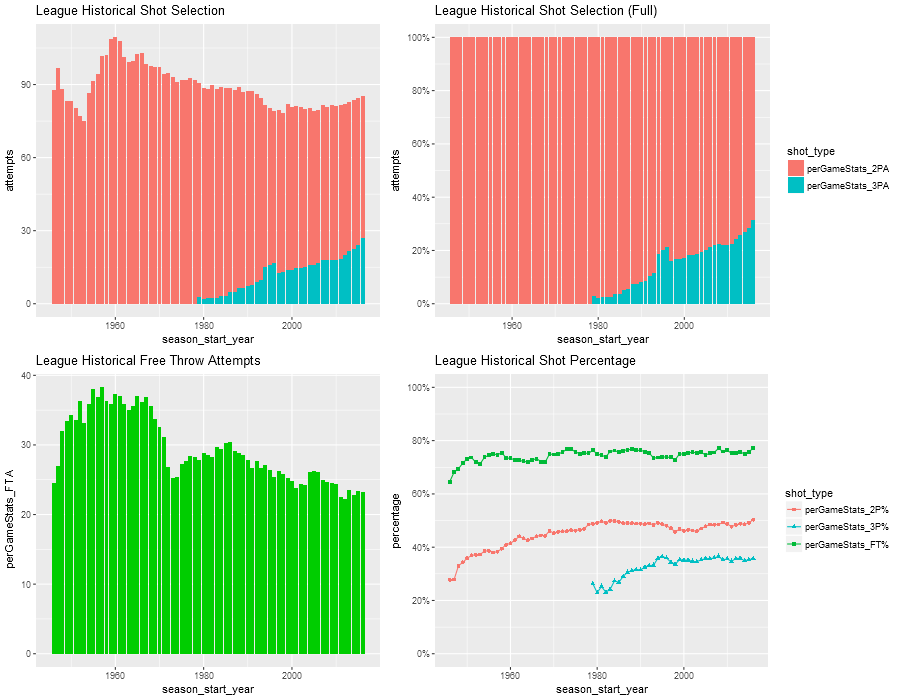

In [232]:
%%R -i leagueShootingAttemptDf -i leagueFTShootingAttemptDf -i leagueShootingPercentageDf -w 900 -h 700 -u px
shooting2p3pPlot(leagueShootingAttemptDf, leagueFTShootingAttemptDf, leagueShootingPercentageDf, 'League')

This is such a good depiction of where the league was, is, and is headed. Wow.

I'm not here to analyze the 60's, I really only care about the raptors, but wtf? The amount of FG and FT attempted in 1960 was insane. I don't quite know enough about the history of ball to go back that far... what happened exactly? Did rules change? Less fouls? New players and teams? Too many questions that I don't have the time or focus right now to explore, but one has to marvel at how fast the game apparently was. Seeing all the old clips, it didn't look like they were at all as athletic as someone like Westbrook is today, but that may just show my naivety here.

In other news, we're definitely on our way back to that pace in today's NBA. Some key takeaways for me, since 2000 are:
- **More FG being taken, period (faster pace?)**
- **More 3's being taken with no sign of stopping**
- **Less FT being taken (less stoppage of games, more fluid pace, perhaps leading to faster pace as well, or am I an idiot?)**

Basically, all 3 of these points lead towards faster pace in my mind. And in a sense, all 3 can be attributed to a team shooting more 3's. When you shoot more 3's, you shoot less 2's (duh), but teams are also shooting more in volume, so it's the percentage of 3's that's pushing this volume up. When you shoot more 3's, you also are probably getting fouled less. How many times do you see Harden get fouled on the 3 vs Demar getting fouled on a drive? Maybe that's not fair to compare as each are experts in their realm, but the fact still stands. When Harden kicks it out to a Ryan Anderson or Trevor Ariza for a 3, what are the chances of those guys getting fouled? Not high because they're probably wide open from a James Harden double-team. If I think back to the SSOL suns, they basically made it a mandate not to foul. Worst case, let the other team score, so we can get the ball back and jack up a 3. That's probably not what's happening exactly with every team, but I think the element of shooting 3's speeding up the pace of the game and leading to less fouls and stoppages for more fluidity is evident in the data, for now.

## Other Teams
For fun, I just want to take a look at the rockets and spurs. One I would say one of the most inconsistent teams in terms of playing style (especially as of late), and one that's the most consistent through history driven from Pop and RC Buford.

In [236]:
rocketsShootingAttemptDf, rocketsFTShootingAttemptDf, rocketsShootingPercentageDf = shooting2p3pPrepare('HOU')

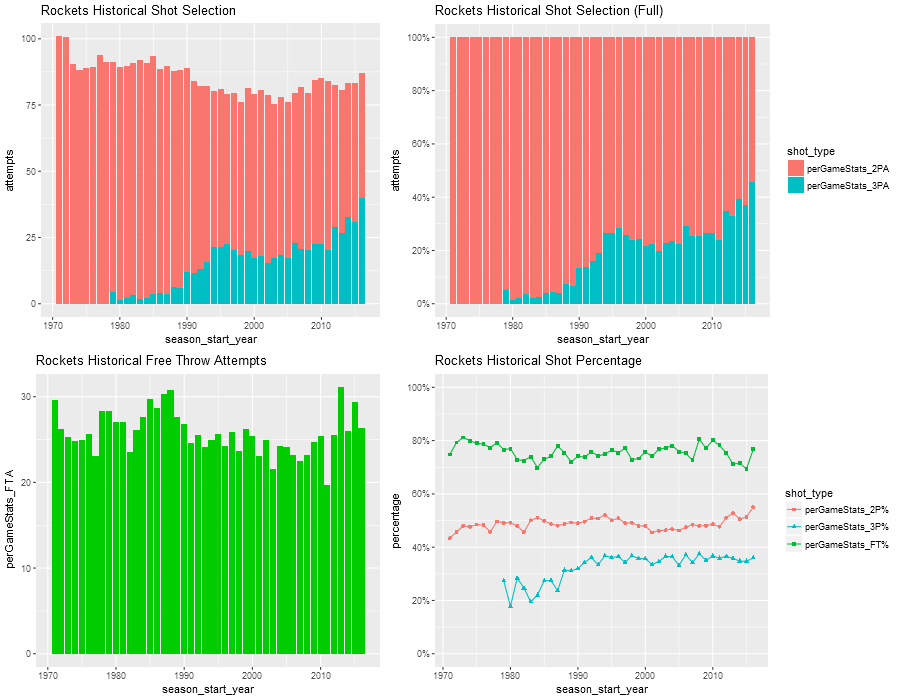

In [237]:
%%R -i rocketsShootingAttemptDf -i rocketsFTShootingAttemptDf -i rocketsShootingPercentageDf -w 900 -h 700 -u px
shooting2p3pPlot(rocketsShootingAttemptDf, rocketsFTShootingAttemptDf, rocketsShootingPercentageDf, 'Rockets')

Lmao. Alright then. We see the rockets creeping up to <span style="color:red">**50% FGA AS 3PA?!?!?!?!?!**</span> Literally doubling what they were shooting in the early 2000's #D'Antoni. The free throw attemps are also widely inconsistent. This team is basically me in a pickup game.

This rockets team may not be as SSOL-ish as the SSOL suns though, we see that the number of shots jacked up is actually less than the league average. We're skipping a few steps in terms of accounting for other sources of possessions (e.g. turnovers) but on the surface they don't play as "fast" as I thought (via reddit knowledge baha).

In [238]:
spursShootingAttemptDf, spursFTShootingAttemptDf, spursShootingPercentageDf = shooting2p3pPrepare('SAS')

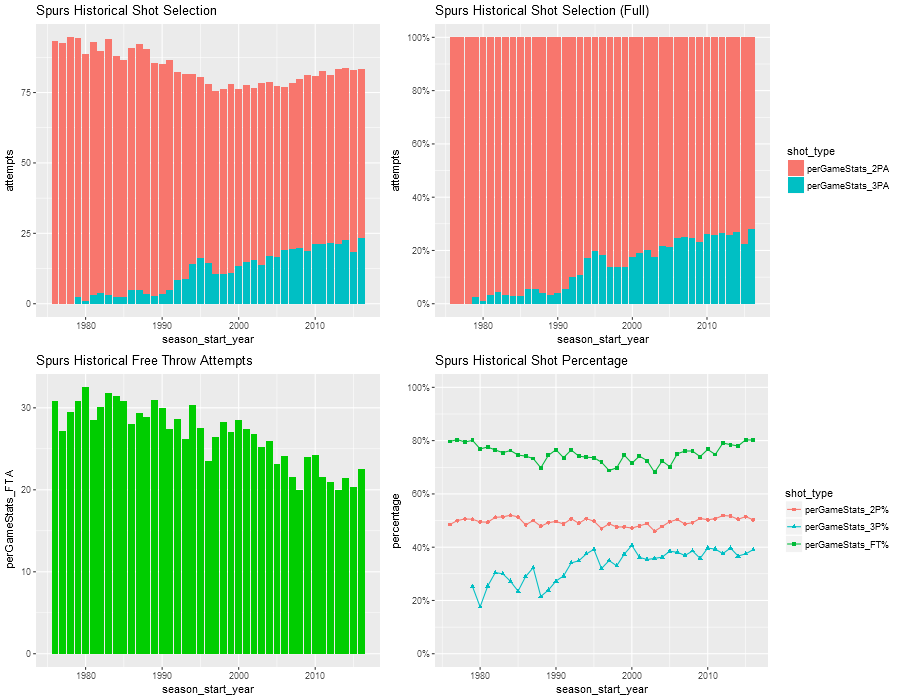

In [239]:
%%R -i spursShootingAttemptDf -i spursFTShootingAttemptDf -i spursShootingPercentageDf -w 900 -h 700 -u px
shooting2p3pPlot(spursShootingAttemptDf, spursFTShootingAttemptDf, spursShootingPercentageDf, 'Spurs')

The rockets actually jack up as much FGA as the spurs! Wtf? It's clear that the spurs have different shot selection, but I would have thought they would have played at a much slower pace. Judging by FGA, it doesn't seem so. It is also interesting to see the consistency of spurs FGA over the years as well. from 2000 and on, 2P and 3P attempts have fallen at quite a predictable rate.

## Conclusion
Now that we've had our fun, let's bring it back to the raptors. Overall, from a shooting perspective, Toronto doesn't seem to lose it's identity. We have players that can make threes sometimes, we have players that can take it to the hole and get fouled sometimes. It's not much different than the lifecycle of any other team to be honest. However, let's continue exploring efficiency in our next posts.